# 2. laboratorijska vježba

In [4]:
# učitvanje potrebnih biblioteka

import numpy as np
import matplotlib.pyplot as plt

In [5]:
# pomoćna funkcija

def plot_frequency_response(f, Hm):
    """Grafički prikaz prijenosne funkcije filtra.
    
    Args
    f (numpy.ndarray) : frekvencije
    Hm (numpy.ndarray) : apsolutne vrijednosti prijenosne funkcije
    
    Returns
    (matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)
    """
    Hc = 1 / np.sqrt(2)
    fc_idx = np.where(np.isclose(Hm, Hc, rtol=1e-03))[0][0]
    fc = f[fc_idx]
    H_db = 20 * np.log10(Hm)
    
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 7.5))

    ax[0,0].plot(f, Hm, label='$H(f)$')
    ax[0,0].plot(fc, Hc, 'o', label='$H(f_c)$')
    ax[0,0].vlines(fc, Hm.min(), Hc, linestyle='--')
    ax[0,0].annotate(f'$f_c = {fc:.3f}$ Hz\n$H(f_c)={Hc:.3f}$', (fc * 1.4, Hc))
    ax[0,0].set_xscale('log')
    ax[0,0].set_ylabel('$|V_{out}$ / $V_{in}$|')
    ax[0,0].set_title('log scale')
    ax[0,0].legend(loc='lower left')
    ax[0,0].grid()
    
    ax[0,1].plot(f, Hm, label='$H(f)$')
    ax[0,1].plot(fc, Hc, 'o', label='$H(f_c)$')
    ax[0,1].annotate(f'$f_c = {fc:.3f}$ Hz\n$H(f_c)={Hc:.3f}$', (fc * 1.4, Hc))
    ax[0,1].set_title('linear scale')
    ax[0,1].legend()
    ax[0,1].grid()

    ax[1,0].plot(f, H_db, label='$H_{dB}(f)$')
    ax[1,0].plot(fc, H_db.max() - 3, 'o', label='$H_{dB}(f_c)$')
    ax[1,0].vlines(fc, H_db.min(), H_db.max() - 3, linestyle='--')
    ax[1,0].annotate(f'$f_c = {fc:.3f}$ Hz\n$H(f_c)={H_db.max() - 3:.3f} dB$',
                     (fc * 1.4, H_db.max() - 3))
    ax[1,0].set_xscale('log')
    ax[1,0].set_xlabel('$f$ [Hz]')
    ax[1,0].set_ylabel('$20 \\cdot \\log$ |$V_{out}$ / $V_{in}$|')
    ax[1,0].legend(loc='lower left')
    ax[1,0].grid()

    ax[1,1].plot(f, H_db, label='$H_{dB}(f)$')
    ax[1,1].plot(fc, H_db.max() - 3, 'o', label='$H_{dB}(f_c)$')
    ax[1,1].annotate(f'$f_c = {fc:.3f}$ Hz\n$H(f_c)={H_db.max() - 3:.3f} dB$',
                     (fc * 1.4, H_db.max() - 3))
    ax[1,1].set_xlabel('$f$ [Hz]')
    ax[1,1].legend()
    ax[1,1].grid()

    fig.tight_layout
    return fig, ax

## Električni filtri

Općenito, filtar u domeni elektromagnetske kompatibilnosti, kao i kroz ovaj kolegij, promatramo kao model električnog kruga definiranog koristeći koncentrirane parametre. Signal s ulaza se oblikuje na način da njegove komponente pri određenim frekvencijama filtar propušta bez izobličenja (u teoriji), dok na drugim frekvencijama komponente uopće ne propušta (u teoriji, u stvarnosti dolazi do jače ili slabije atenuacije). Selektivno propuštanje signala se radi ponajprije kako bi se potisnule ili u potpunosti otklonile neželjene komponente signala.

S obzirom na frekvencijski pojas propusta, filtre dijelimo u osnovne kategorije:
1. nisko-propusni filtri - propuštaju se sve frekvencije signala ispod tzv. *cutoff* frekvencije;
2. visoko-propusni filtri - propuštaju se sve frekvencije signala iznad *cutoff* frekvencije;
3. pojasno-propusni filtri - propušta se definirani frekvencijski opseg;
4. pojasno-nepropusni filtri - ne propušta se određeni frekvencijski opseg.

S obzirom na tip koncentriranih parametara, odnosno komponenti koje koristimo kako bismo računalno modelirali rad filtra, filtre dijelimo na dodatne kategorije:
1. aktivni filtri - realizirani uz pomoć aktivnih komponenti (tranzistori i operacijska pojačala);
2. pasivni filtri - realizirani uz pomoć pasivnih komponenti (otpornici, kondenzatori i zavojnice).

### Pasivni nisko-propusni filtar

Realizacija nisko-propusnog filtra u ovim laboratorijskim vježbama se ostvaruje korištenjem otpornika i kondenzatora povezanih u seriju, pri čemu se izlaz promatra kao napon na kondenzatoru, $V_{out}$. Uz pretpostavku da je signal na ulazu, $V_{in}$, sinusoidalni naponski izvor, analizu možemo prebaciti u frekvencijsku domenu koristeći impedancijski model. Na ovaj način zaobilazimo potrebu korištenja diferencijalnog i čitav problem svodimo na jednostavni algebarski proračun.

<center>
<img src="static/rc-lowpass.png" alt="simple-rc-lowpass" width="300"/>
</center>
    
Napon na kondenzatoru, $V_{out}$, definiramo kroz podjelu ulaznog napona:

$$
\begin{align}
    V_{out} &= \frac{Z_c}{Z_c + Z_r} \cdot V_{in} \\
    \frac{V_{out}}{V_{in}} &= \frac{Z_c}{Z_c + Z_r} = \frac{1/(j\omega C)}{1/(j\omega C) + R} = \frac{1}{1 + j\omega C R}
\end{align}
$$

Dobiveni odnos izlaznog i ulaznog napona se naziva **funkcija prijenosnog odziva**, $H$, u stacionarnom stanju:

$$
H(\omega) = \frac{V_{out}}{V_{in}} = \frac{1}{1 + j\omega C R}
$$

Kako je $H$ funkcija frekvencije, imamo dva rubna slučaja:
* za iznimno niske frekvencije kada je $\omega \sim 0$ slijedi da je $H(\omega) = 1$;
* za iznimno visoke frekvencije kada $\omega \rightarrow \infty$ slijedi da je $H(\omega) \rightarrow 0$.

Potrebno je dodatno definirati već spomenutu *cutoff* frekvenciju, $f_c$, za koju amplituda funkcije frekvencijskog odziva, $H$, pada za $\sqrt 2$ puta, odnosno za $3$ dB:

$$
\begin{align}
    \frac{H(\omega)}{\sqrt 2} &= \frac{1}{1 + j\omega_c C R} \\
    \omega_c &= \frac{1}{CR} \\
    f_c &= \frac{1}{2\pi CR}
\end{align}
$$

Link za interaktivni rad s pasivnim nisko-propusnim filtrom: http://sim.okawa-denshi.jp/en/CRtool.php

Prvi zadatak je implementirati funkciju `cutoff_frequency` koja na ulazu prima iznose otpora, `R`, i kapaciteta, `C`, a na izlazu daje *cutoff* frekvenciju nisko-propusnog filtra.

In [6]:
def cutoff_frequency(R, C):
    """Cutoff frekvencija nisko-propusnog filtra.
    
    Args:
        R (number) : vrijednost otpora otpornika
        C (number) : kapacitet kondenzatora
    
    Returns:
        number
    """
    #######################################################
    ## TO-DO: implementiraj proračun cutoff frekvencije ##
    # Nakon toga zakomentiraj sljedeću liniju.
    # raise NotImplementedError('Implementiraj proračun cutoff frekvencije.')
    #######################################################

    # definiraj cutoff frekvenciju
    fc = 1 / (2 * np.pi * R * C)
    return fc

Kolika je *cutoff* frekvencija za otpor od $4.5 k \Omega$ i kapacitet kondenzatora od $7 \mu F$?

In [7]:
R = 4.5e3  # otpor u Ohm
C = 7.0e-6  # kapacitet u F

fc = cutoff_frequency(R, C)

print(f'R = {R / 1000:.2f} kΩ')
print(f'C = {C * 10**6:.2f} µF')
print(f'cutoff frekvencija iznosi {fc:.2f} Hz, '
      'očekivana vrijednost je 5.05 Hz')

R = 4.50 kΩ
C = 7.00 µF
cutoff frekvencija iznosi 5.05 Hz, očekivana vrijednost je 5.05 Hz


Drugi zadatak je implementirati funkciju `rc_lowpass` koja na ulazu prima iznose otpora, `R`, kapaciteta, `C`, i frekvenciju, `f`, a na izlazu daje prijenosni odziv nisko-propusnog filtra.

In [8]:
def rc_lowpass(R, C, f):
    """Funkcija prijenosnog odziva RC nisko-propusnog filtra.
    
    Args:
        R (number) : vrijednost otpora otpornika
        C (number) : kapacitet kondenzatora
        f (number or numpy.ndarray) : frekvencija/e
    
    Returns:
        float or numpy.ndarray
    """
    ######################################################
    ## TO-DO: implementiraj funkciju prijenosnog odziva ##
    # Nakon toga zakomentiraj sljedeću liniju.
    # raise NotImplementedError('Implementiraj funckiju prijenosnog odziva.')
    ######################################################

    # definiraj funkciju prijenosnog pazeći da `f` može biti ili broj (int,
    # float) ili 1-D niz (`numpy.ndarray`)
    H = 1 / (1 + 2j * np.pi * f * C * R) 
    return H

Kolika je vrijednost prijenosne funkcije pri *cutoff* frekvencija za otpor od $4.5 k \Omega$ i kapacitet kondenzatora od $7 \mu F$?

In [9]:
R = 4.5e3  # otpor u Ohm
C = 7.0e-6  # kapacitet u F

Hc = rc_lowpass(R, C, fc)  # prijenosna funkcija pri cutoff frekvenciji

print(f'R = {R / 1000:.2f} kΩ')
print(f'C = {C * 10**6:.2f} µF')
print(f'pojačanje pri cutoff frekvenciji iznosi {abs(Hc):.4f}, '
      'očekivana vrijednost je 1/√2 - '
      'provjerite ispravnost dobivenog rezutltata')

R = 4.50 kΩ
C = 7.00 µF
pojačanje pri cutoff frekvenciji iznosi 0.7071, očekivana vrijednost je 1/√2 - provjerite ispravnost dobivenog rezutltata


Pretvorite vrijednost prijenosne funkcije pri *cutoff* frekvenciju u decibele i uvjerite se u tvrdnju da amplituda funkcije frekvencijskog odziva, $H$, pada za $3$ dB pri *cutoff* frekvenciji.

In [10]:
Hc_dB = 20 * np.log10(abs(Hc))  # pretvorba prijenosne funkcije pri cutoff frekvenciji u dB skalu
print(Hc_dB)

-3.0102999566398116


Za raspon frekvencija do $100 Hz$ te za otpor od $4.5 k\Omega$ i kapacitet kondenzatora od $7 \mu F$, izračunajte vrijednosti prijenosne funkcije.

In [11]:
f = np.linspace(0, 100, 10000)  # raspon frekvencija od 0 do 100 Hz

H = rc_lowpass(R, C, f)  # prijenosna funkcija

S obzirom da su vrijednosti prijenosne funkcije kompleksne veličine, razmilite što je potrebno napraviti s njima prije nego ih grafički prikažemo?

In [12]:
Hm = np.abs(H)

Vizualizirajte ovisnost prijenosne funkcije o frekvenciji koristeći `matplotlib` i funkciju `matplotlib.pyplot.plot`.

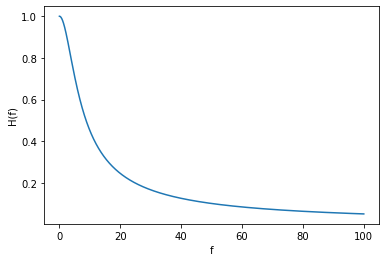

In [13]:
import matplotlib.pyplot as plt

plt.plot(f, Hm)
plt.xlabel('f')
plt.ylabel('H(f)')
plt.show()

Vizualizirajte sada rezultate koristeći već implementiranu funkciju `plot_frequency_response`.

Napomena: za provjeru načina korištenja prethodne funkcije koristite sljedeću naredbu:

```python
help(plot_frequency_response)
```

ili jednostavno

```python
plot_frequency_response?
```

In [14]:
# provjerite način korištenja funkcije

plot_frequency_response?

Signature: plot_frequency_response(f, Hm)
Docstring:
Grafički prikaz prijenosne funkcije filtra.

Args
f (numpy.ndarray) : frekvencije
Hm (numpy.ndarray) : apsolutne vrijednosti prijenosne funkcije

Returns
(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)
File:      ~/github/teaching/emc_512/lab/Python/<ipython-input-5-7a5410f6927f>
Type:      function


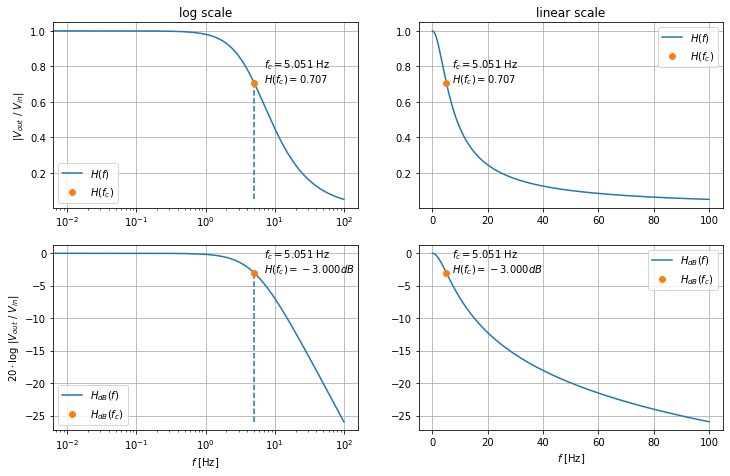

In [15]:
fig, ax = plot_frequency_response(f, Hm)  # grafički prikaz dobivenih rezultata

### Butterworthov filtar
Butterworthov filtar vrsta je filtra za obradu signala dizajnirana tako da je frekvencijski odziv što je moguće ravniji u propusnom opsegu. 

<img src="static/butterworth-lowpass.png" alt="butterworth" width="500"/>

Funkcija prijenosnog odziva, $H$, niskopropusnog Butterworth filtra trećeg reda (Cauer, ljestvasta topologija), prikazanog na slici poviše, ima sljedeći oblik:

$$H(s) = \frac{V_o(s)}{V_i(s)} = \frac{R_4}{s^3(L_1 C_2 L_3) + s^2(L_1 C_2 R_4) + s(L_1 + L_3) + R_4}$$

Ukoliko zadržimo istu *cutoff* frekvenciju kao i u prvom primjeru, funkcija Butterworthovog filtra će, kao glavnu prednost, imati puno strmiju granicu propusnog i nepropusnog frekvencijskog područja (ovisno o redu filtra).

In [5]:
from scipy.signal import (butter, freqz)

In [6]:
sample_rate = 1000
order = 3
nyq = 0.5 * sample_rate
f_cutoff_norm = f_cutoff / nyq
b, a = butter(N=order, Wn=f_cutoff_norm, btype='low', analog=False, output='ba')
w, h = freqz(b, a, worN=f.size)  # w is normalized to [0, pi)
f = w / np.pi * nyq  # de-normalized frequencies

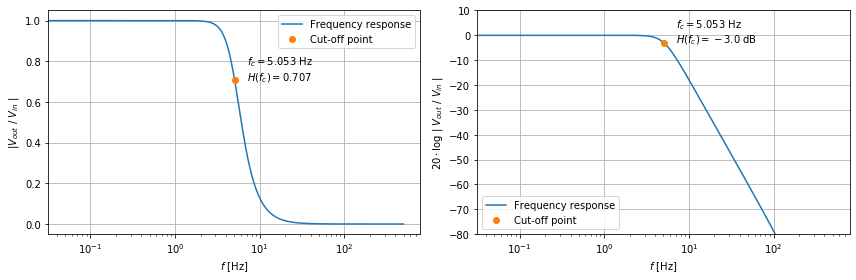

In [7]:
H = np.abs(h)
H_db = 20*np.log10(H)

###visualization
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

## absolutue value of frequency response function
ax[0].plot(f, H, label='Frequency response')
ax[0].plot(f_cutoff, 1/np.sqrt(2), linestyle='none', marker='o', label='Cutoff point')
ax[0].annotate(f'$f_c = {round(f_cutoff, 3)}$ Hz\n$H(f_c)={round(1/np.sqrt(2), 3)}$', (f_cutoff*1.4, 1/np.sqrt(2)))
ax[0].set_xscale('log')
ax[0].set_xlabel('$f$ [Hz]')
ax[0].set_ylabel('$| V_{out}$ / $V_{in}$ |')
ax[0].legend()
ax[0].grid()
## frequency response function in dB
ax[1].plot(f, H_db, label='Frequency response')
ax[1].plot(f_cutoff, H_db.max()-3, linestyle='none', marker='o', label='Cutoff point')
ax[1].annotate(f'$f_c = {round(f_cutoff, 3)}$ Hz\n$H(f_c)={round(H_db.max()-3, 3)}$ dB', (f_cutoff*1.4, H_db.max()-3))
ax[1].set_xscale('log')
ax[1].set_ylim(-80, 10)
ax[1].set_xlabel('$f$ [Hz]')
ax[1].set_ylabel('$20\cdot \log$ | $V_{out}$ / $V_{in}$ |')
ax[1].legend(loc='lower left')
ax[1].grid()
plt.tight_layout()
plt.show()

#### Demonstracija korištenja Butterworth filtra

In [8]:
from scipy.fft import (fft, ifft)
from scipy.fftpack import fftshift
from scipy.signal import lfilter

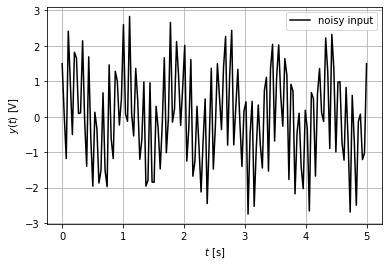

In [9]:
# generate dummy raw noisy data as the input in the filter
T = 5
fs = 30
N = T * fs
t = np.linspace(0, T, N)
noisy_input = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

plt.plot(t, noisy_input, 'k-', label='noisy input')
plt.xlabel('$t$ [s]')
plt.ylabel('$y(t)$ [V]')
plt.legend()
plt.grid()
plt.show()

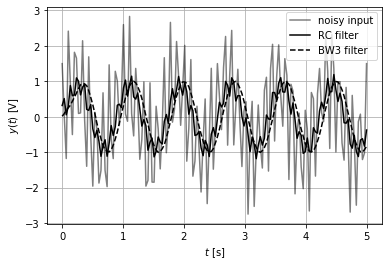

In [10]:
def lowpass_filter(noisy_input, f_cutoff, fs, order):
    f_cutoff_norm = f_cutoff / fs
    b, a = butter(order, f_cutoff_norm, btype='low', analog=False, output='ba')
    return lfilter(b, a, noisy_input)


plt.plot(t, noisy_input, color='k', alpha=0.5, label='noisy input')
plt.plot(t, lowpass_filter(noisy_input, f_cutoff, fs, 1), 'k-', label='RC filter')
plt.plot(t, lowpass_filter(noisy_input, f_cutoff, fs, 3), 'k--', label='BW3 filter')
plt.xlabel('$t$ [s]')
plt.ylabel('$y(t)$ [V]')
plt.legend()
plt.grid()
plt.show()